# Neumann Boundary Conditions

## Comparison Between Methods

We compare here the results obtained for the unperturbed Green's function in the MTI.
In the following, we refer to:

- i. *differential equation* solution, meaning the Green's function obtained by solving the system of coupled differential equations;

- ii. *discretized* solution, referring to the numerical solution obtained as a sum of wavefunctions and eigenenergies computed discretizing the MTI Hamiltonian on a finite lattice along $z$.


### **Space Dependence**

In [1]:
import numpy as np

from MTI_Differential_Equation import GMTI_NeumannBC
from MTI_Discretization import GMTI_discretized, eigenstates_Neumann

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)

# parameters
kx = 0.; ky = 0.; L = 0.010; w = 0.0025
# discrete lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# discretized eigenstates
lattice, egval, spinors = eigenstates_Neumann(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L)

### Green's Function for $z=z'$
We plot here the Green's function $\mathcal{G}^{(0)}(z,z;\omega)$ as a function of the out-of-plane coordinate $z$ and with $z'=z$.

In [2]:
# compute exact Green's function on the lattice
gf_diff_eq = np.array([GMTI_NeumannBC(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in lattice])

# compute approximate Green's function
gf_discretized = np.array([ GMTI_discretized(Nstates=250, egval=egval, spinors=spinors, z=z, Z=z, w=w,  eta=1E-10) for z in range(Nlat)])

#### <font color='green'> **Real Part** </font> 

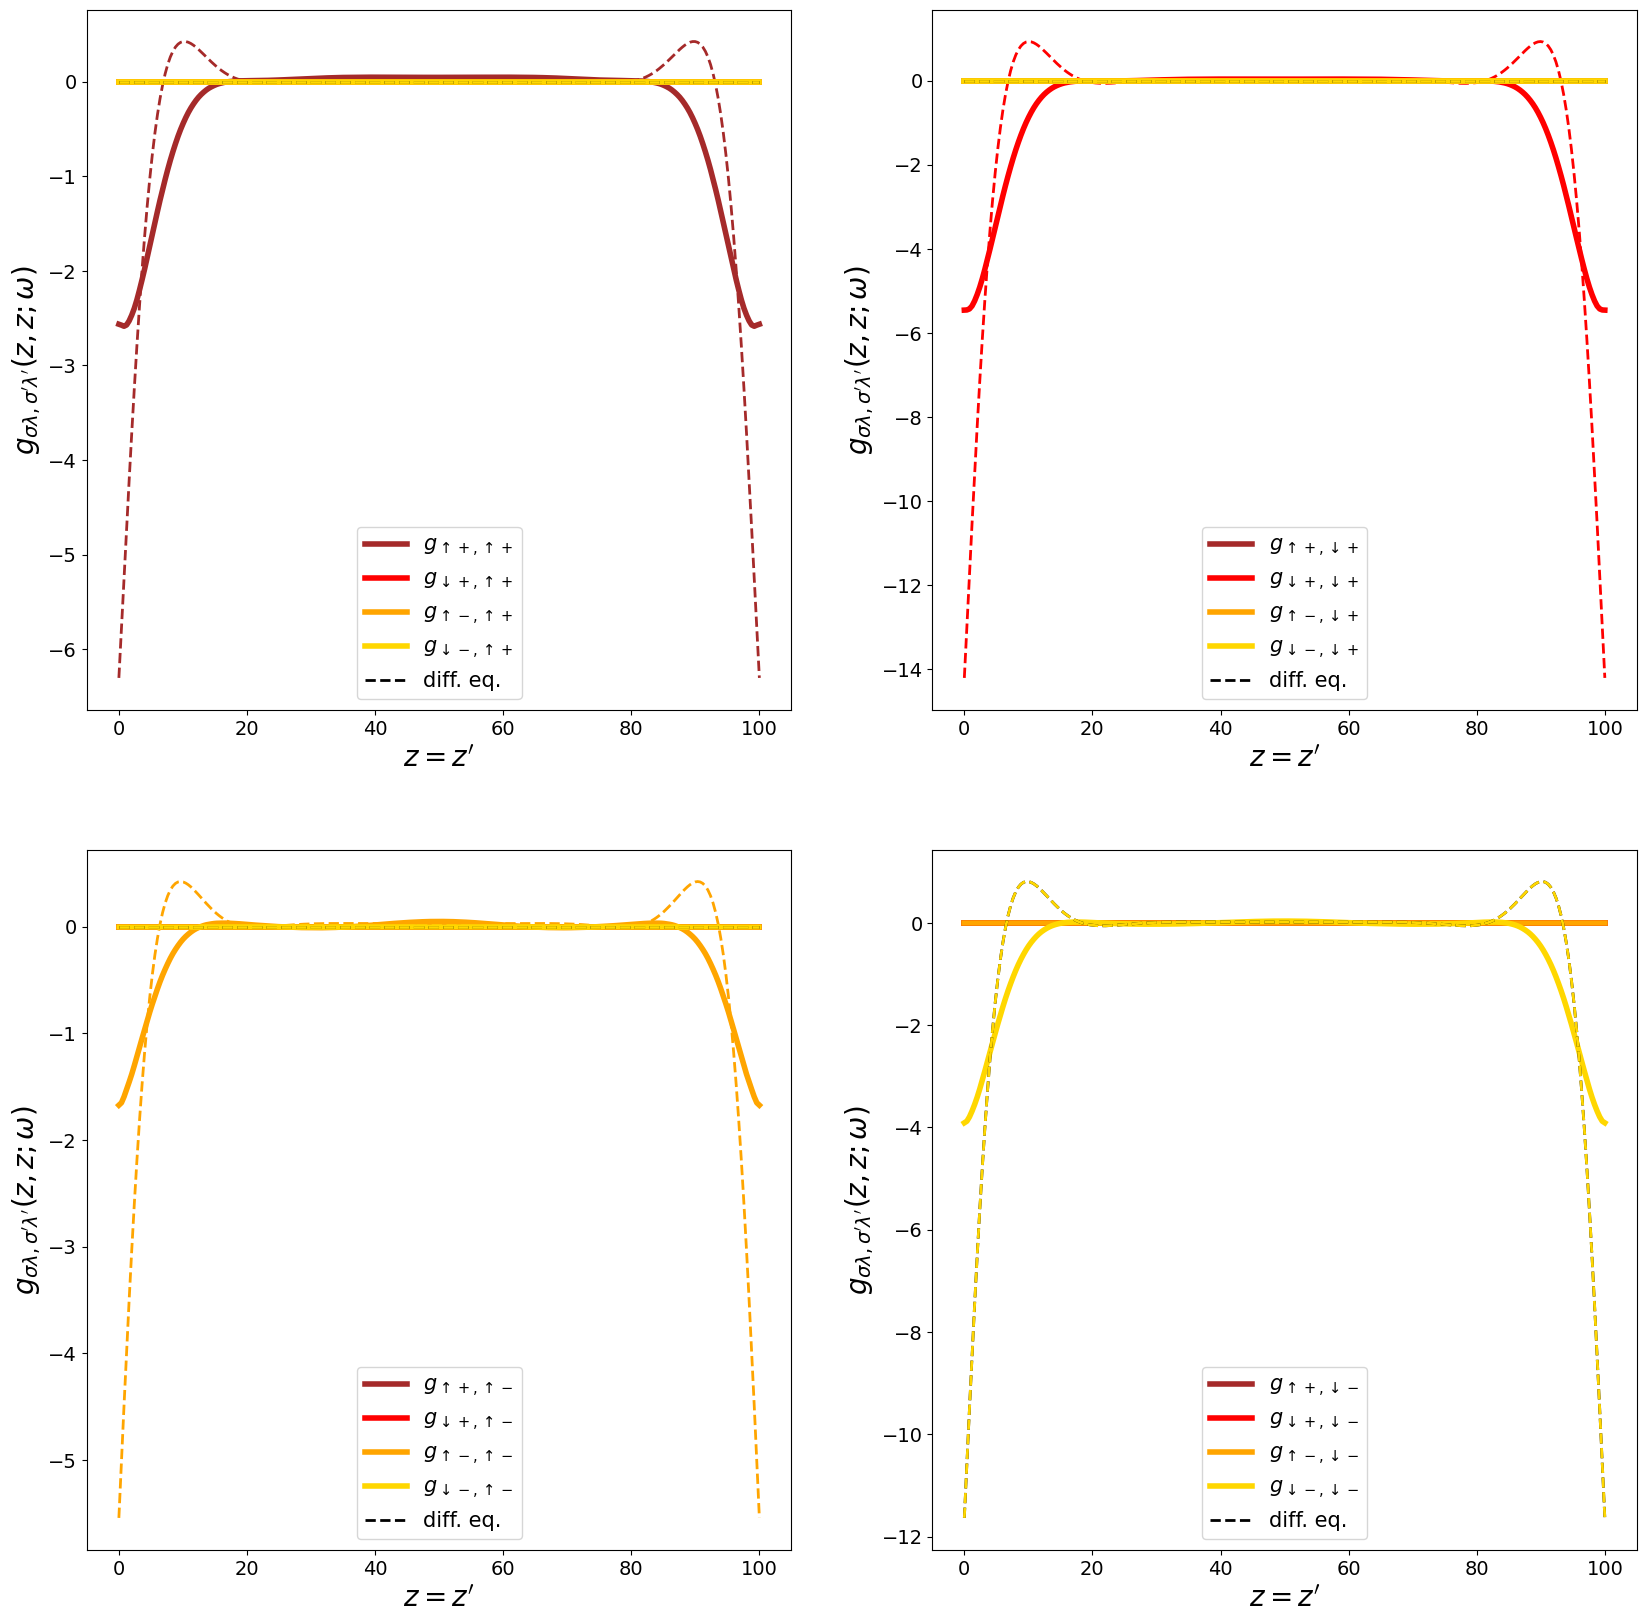

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# colors gradient
#cmap = plt.get_cmap('autumn_r', len(Nstates))

# labels for curves
labels = [["$g_{\\uparrow +, \\uparrow +}$", "$g_{\\uparrow +, \downarrow +}$", "$g_{\\uparrow +, \\uparrow -}$", "$g_{\\uparrow +, \downarrow -}$"],
          ["$g_{\downarrow +, \\uparrow +}$", "$g_{\downarrow +, \downarrow +}$", "$g_{\downarrow +, \\uparrow -}$", "$g_{\downarrow +, \downarrow -}$"],
          ["$g_{\\uparrow -, \\uparrow +}$", "$g_{\\uparrow -, \downarrow +}$", "$g_{\\uparrow -, \\uparrow -}$", "$g_{\\uparrow -, \downarrow -}$"],
          ["$g_{\downarrow -, \\uparrow +}$", "$g_{\downarrow -, \downarrow +}$", "$g_{\downarrow -, \\uparrow -}$", "$g_{\downarrow -, \downarrow -}$"]]


# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot discretized results
        axs[iPic][jPic].plot(lattice, [gf_discretized[idx][irow][icol].real for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )
        
        # plot diff. eq. results
        if irow == 3:
            axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].real for idx in range(Nlat)], '--', c='black', lw=2, label='diff. eq.')
        
        axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].real for idx in range(Nlat)], '--', c=colors[irow], lw=2)
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

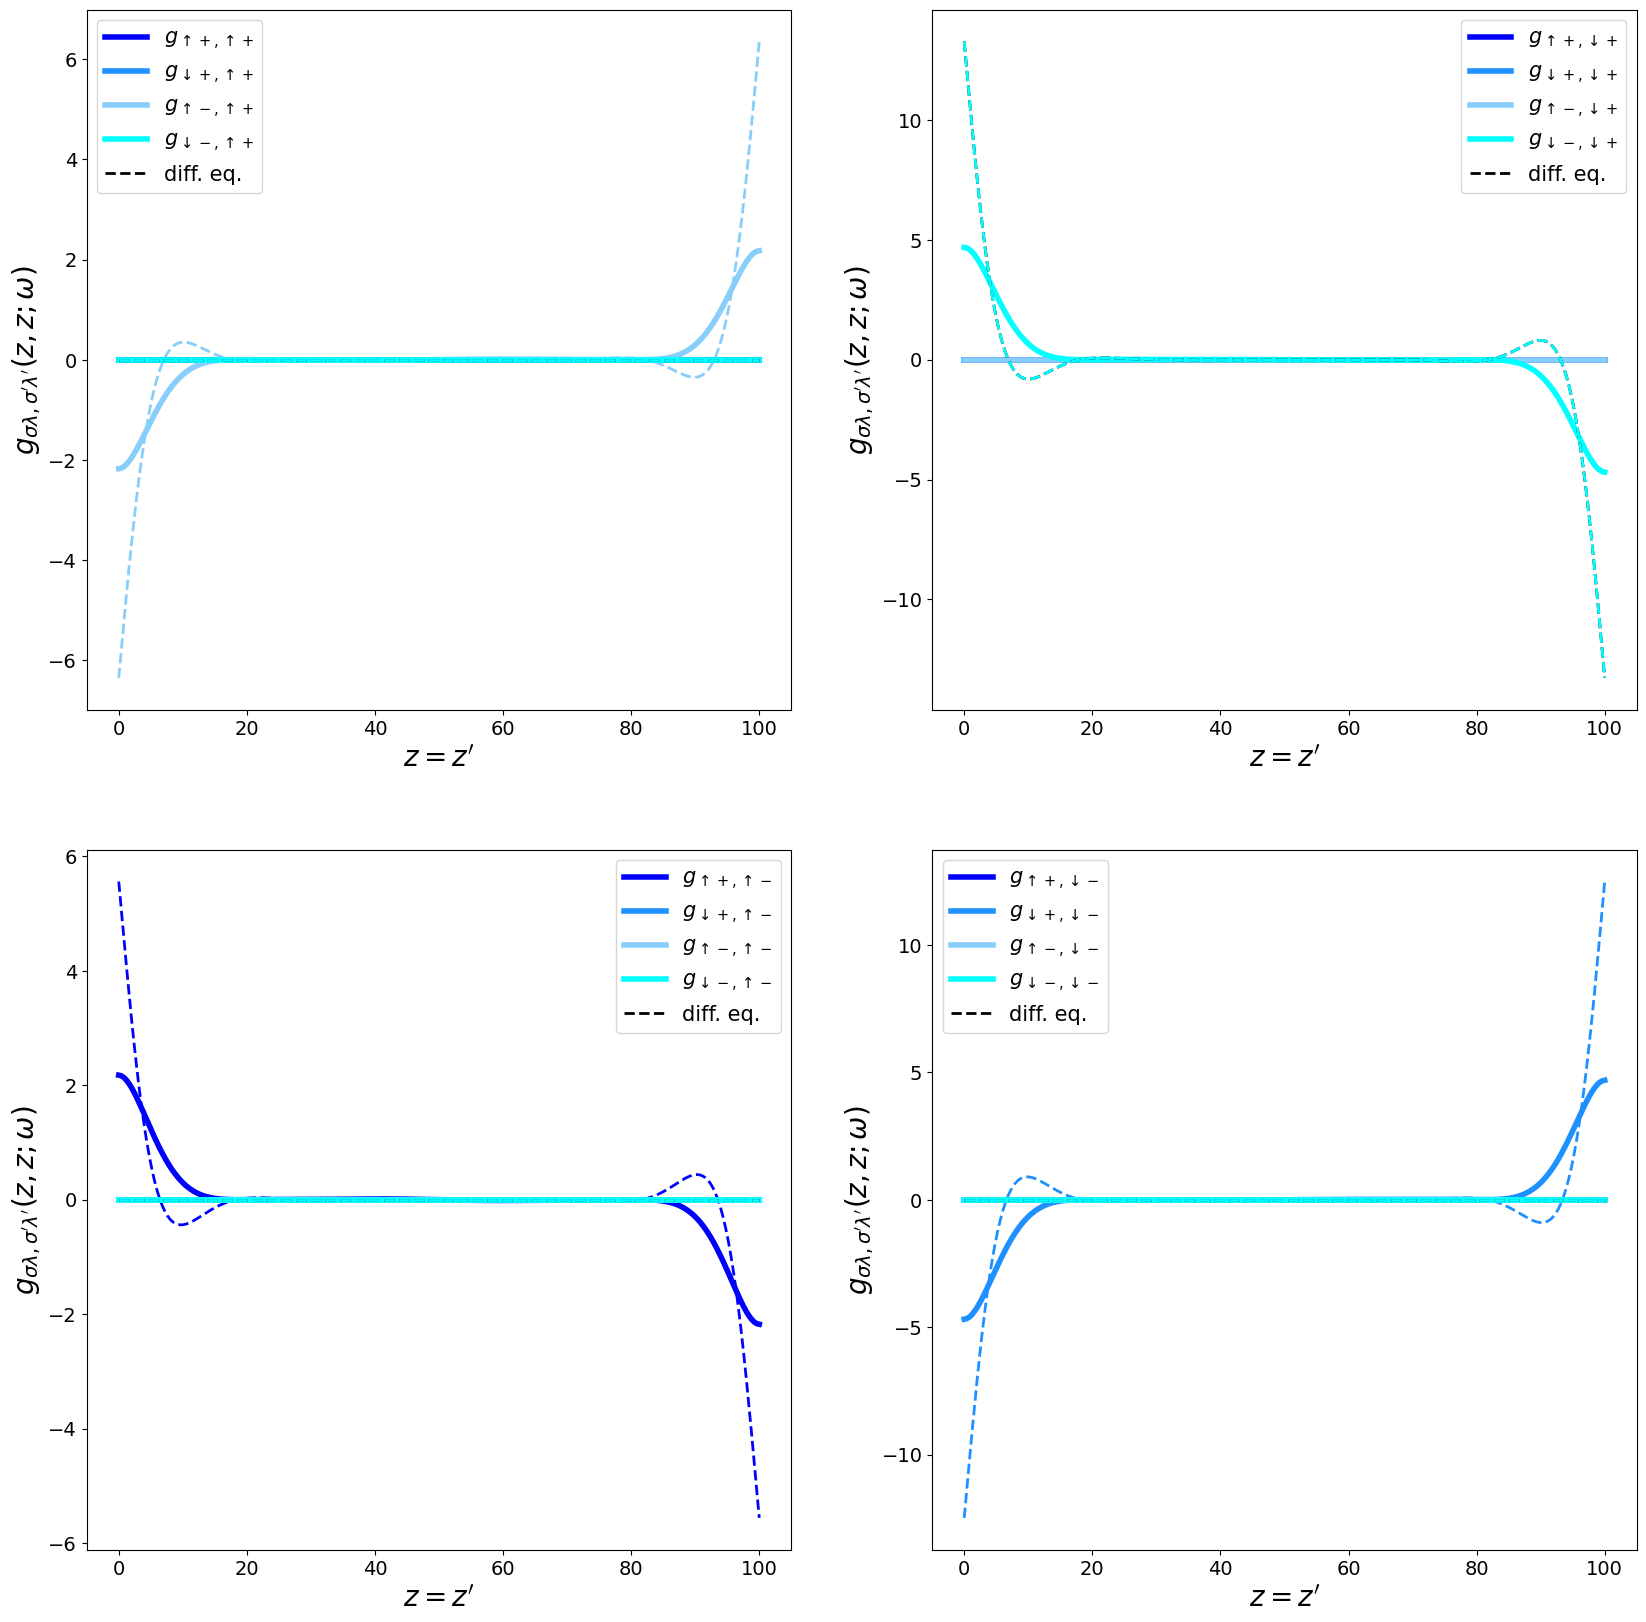

In [4]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

# subplots
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot discretized results
        axs[iPic][jPic].plot(lattice, [gf_discretized[idx][irow][icol].imag for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )
        
        # plot diff. eq. results
        if irow == 3:
            axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].imag for idx in range(Nlat)], '--', c='black', lw=2, label='diff. eq.')
        
        axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].imag for idx in range(Nlat)], '--', c=colors[irow], lw=2)
    
    axs[iPic][jPic].set_xlabel("$z=z'$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font> Green's Function versus $z$ </font> 
We plot here the Green's function $\mathcal{G}^{(0)}(z,z';\omega)$ as a function of the out-of-plane coordinate $z$ for a fixed $z'$.

In [5]:
# z' value
iZ = 87; zp = lattice[iZ]

# compute exact Green's function on the lattice
gf_diff_eq = np.array([GMTI_NeumannBC(d=d, z=z, Z=lattice[iZ], kx=kx, ky=ky, L=L, w=w) for z in lattice])

# compute approximate Green's function
gf_discretized = np.array([ GMTI_discretized(Nstates=250, egval=egval, spinors=spinors, z=z, Z=iZ, w=w, eta=1E-10) for z in range(Nlat)])

#### <font color='green'> **Real Part** </font> 

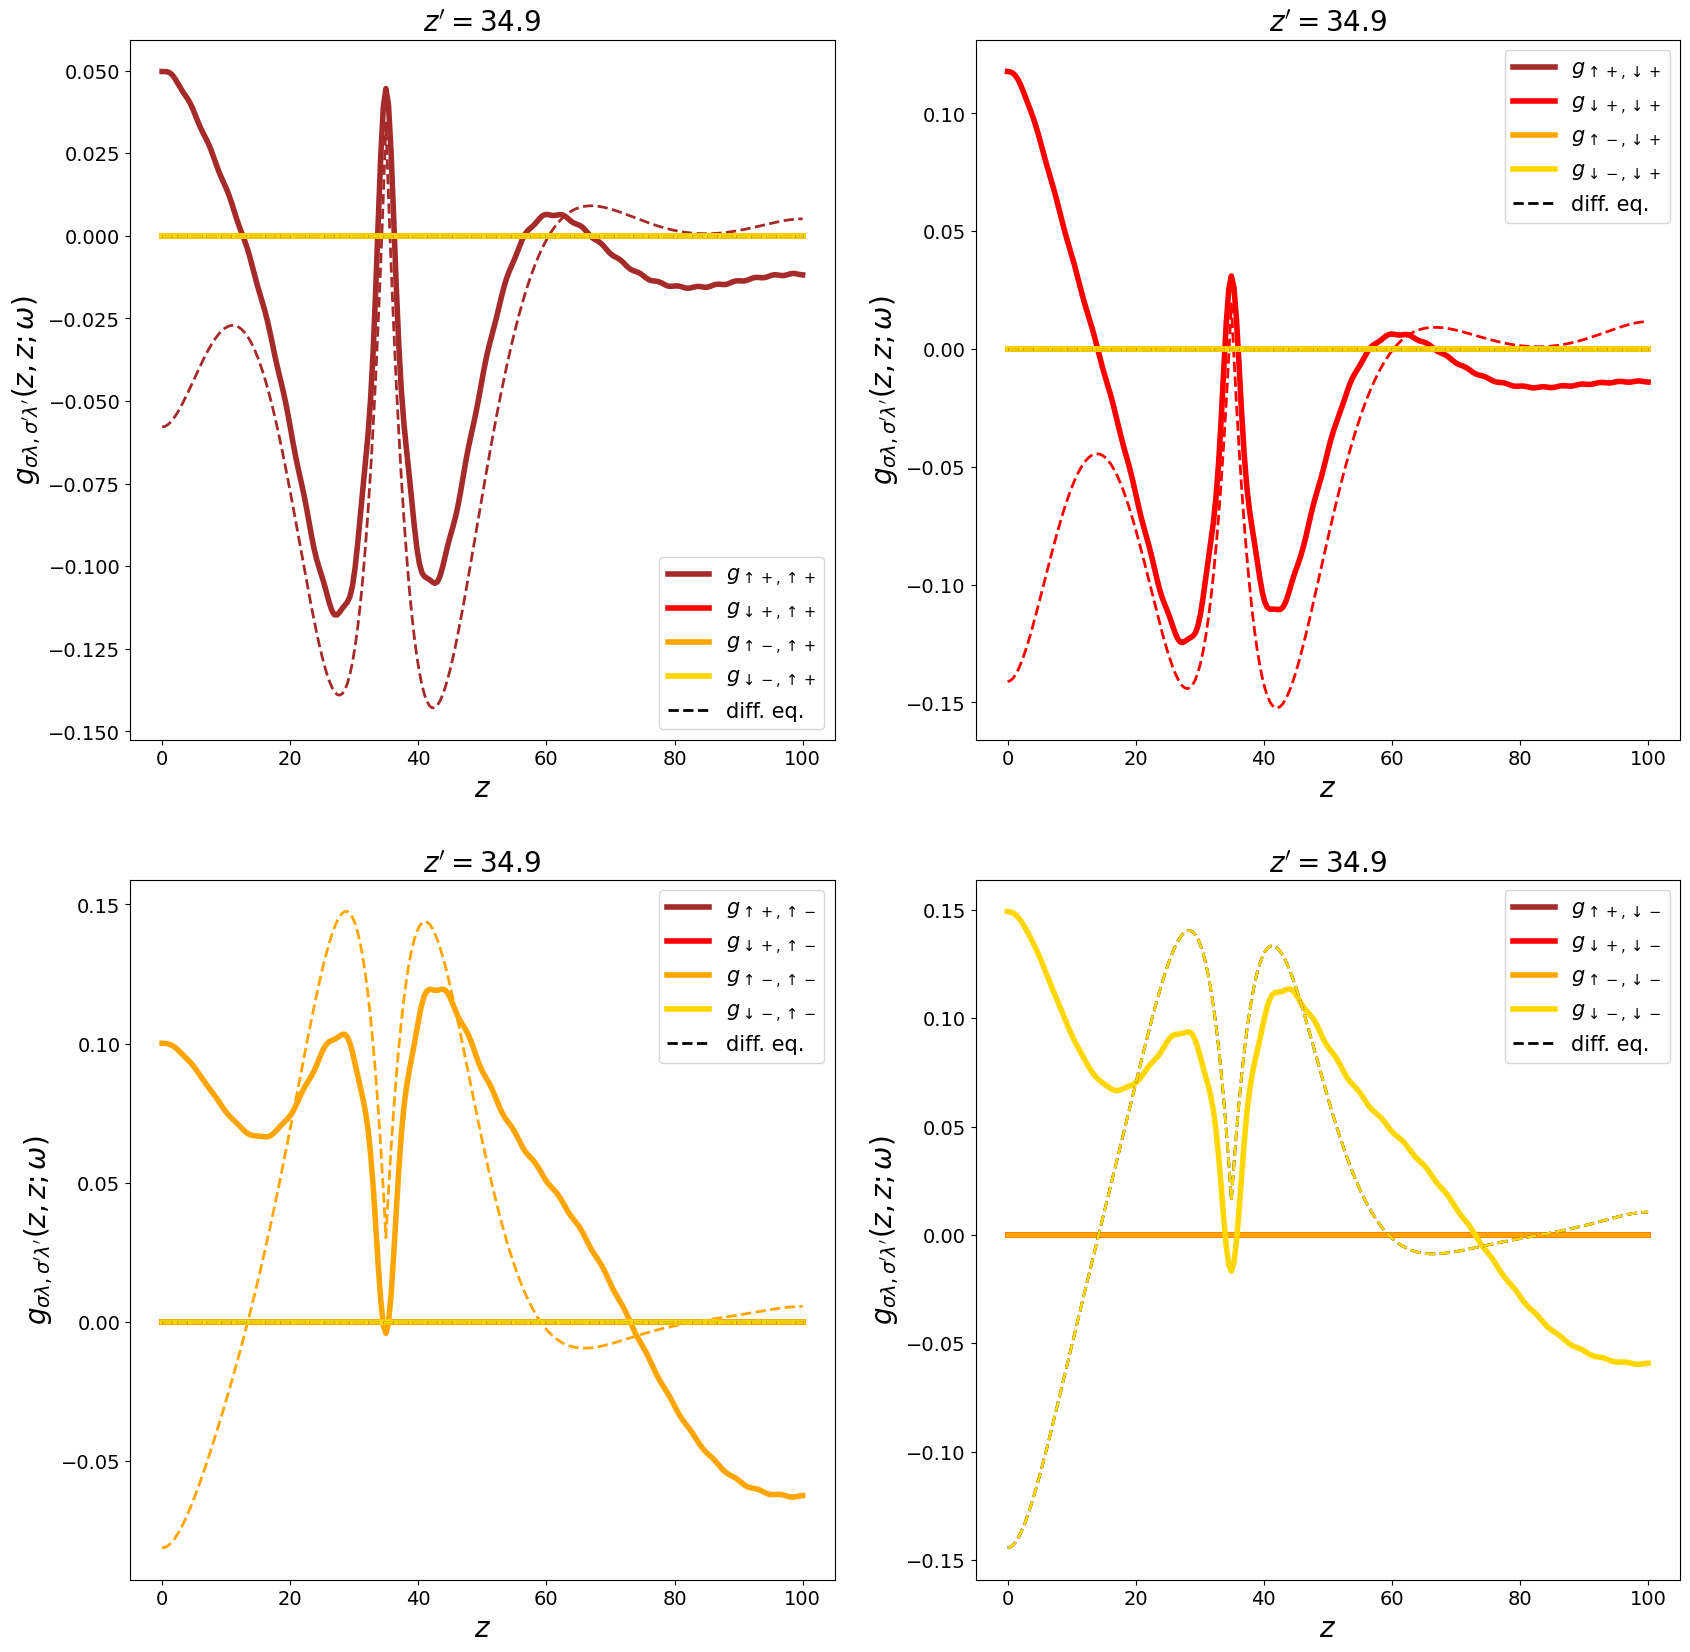

In [6]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']

fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot discretized results
        axs[iPic][jPic].plot(lattice, [gf_discretized[idx][irow][icol].real for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )
        
        # plot diff. eq. results
        if irow == 3:
            axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].real for idx in range(Nlat)], '--', c='black', lw=2, label='diff. eq.')
        
        axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].real for idx in range(Nlat)], '--', c=colors[irow], lw=2)

    axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    axs[iPic][jPic].set_title('$z\' = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

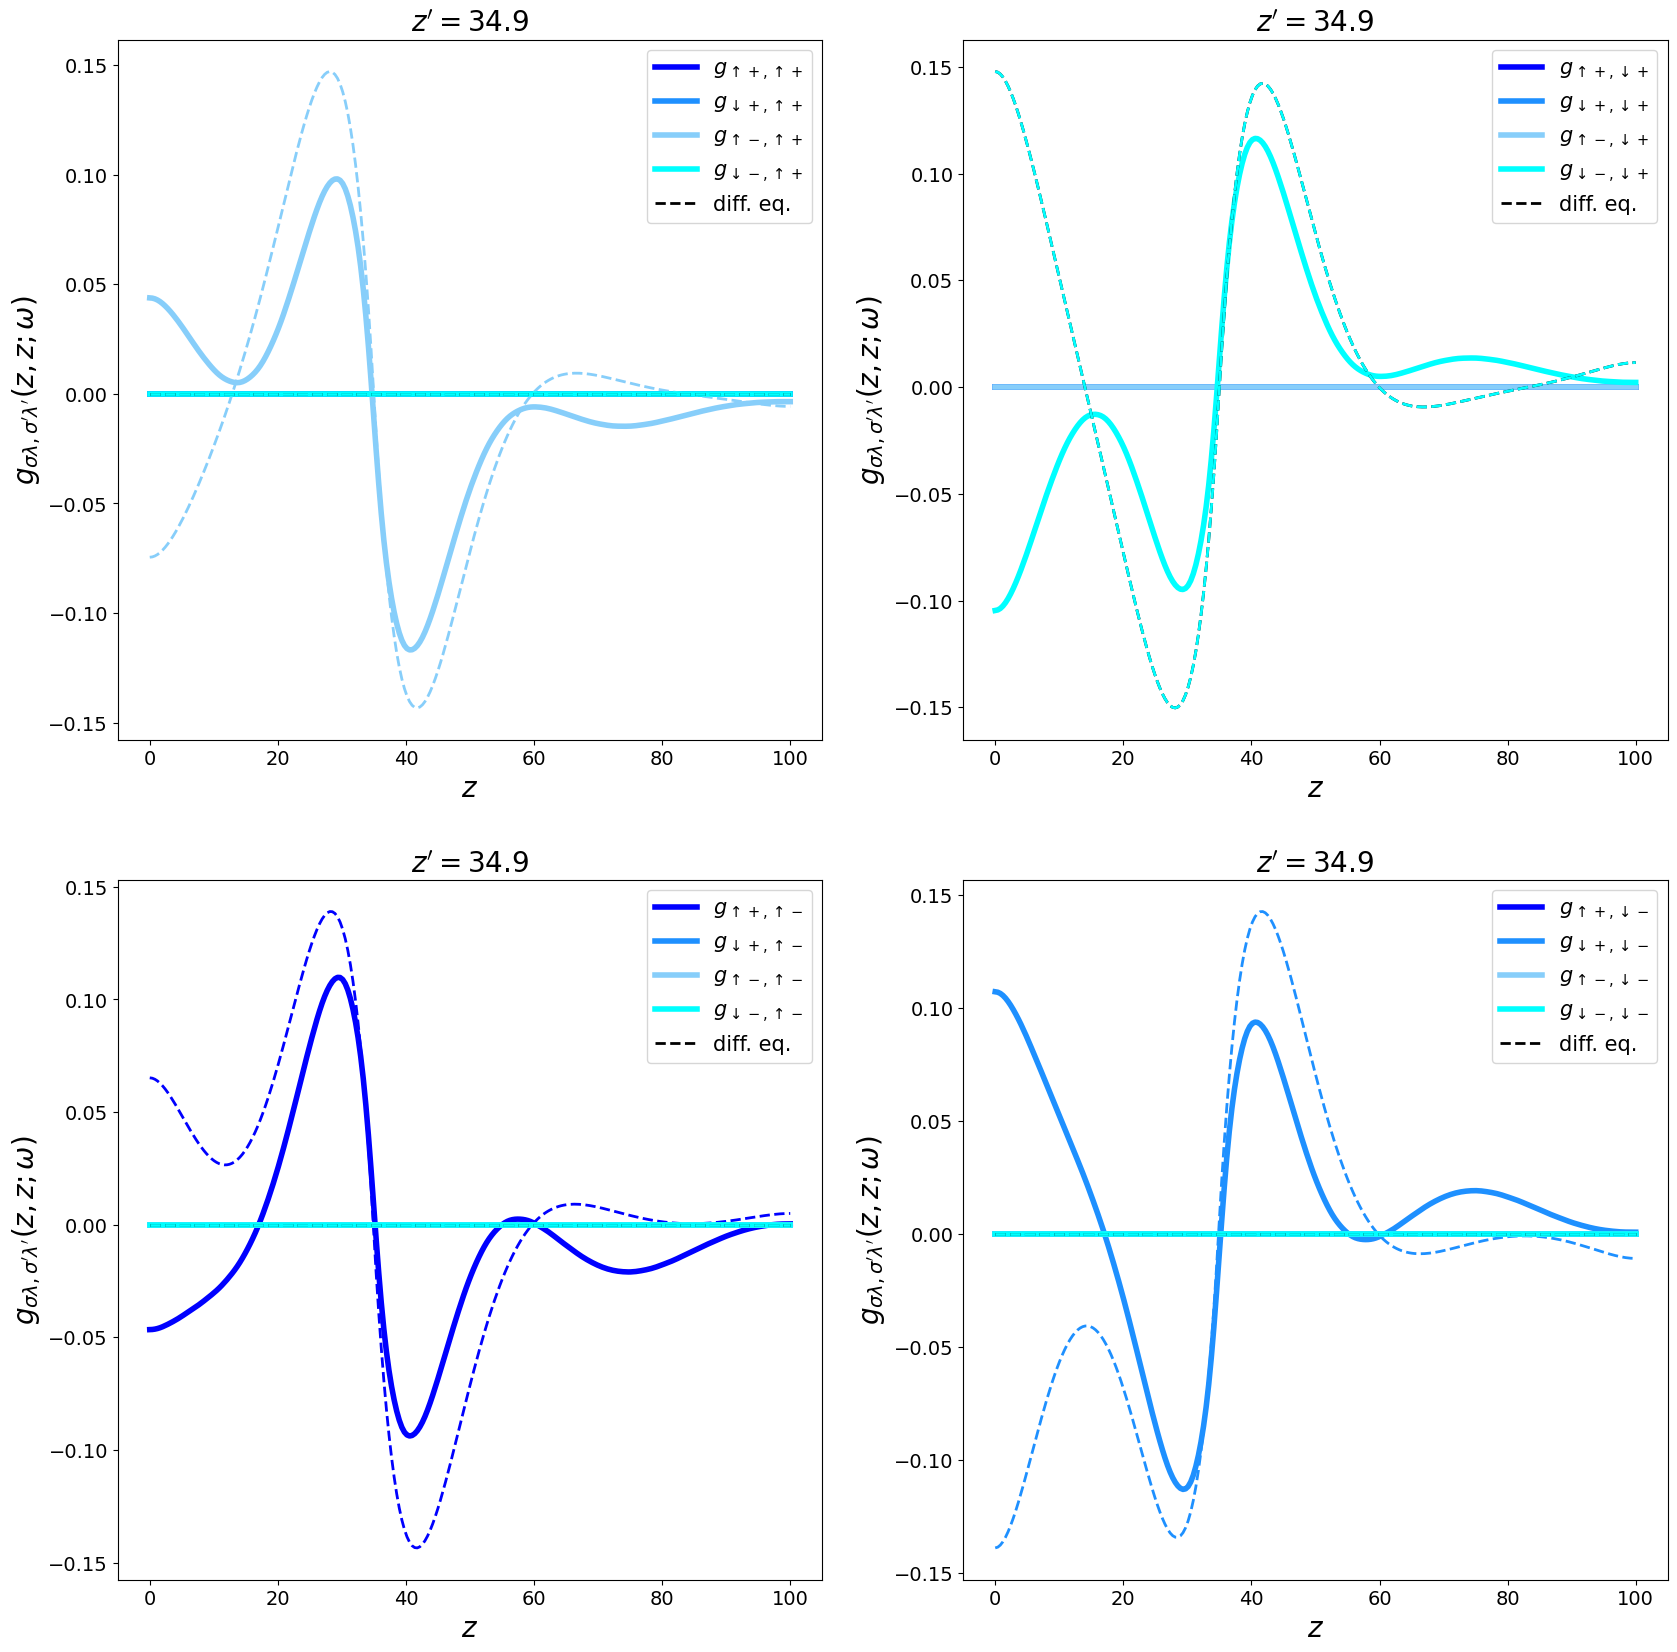

In [7]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot discretized results
        axs[iPic][jPic].plot(lattice, [gf_discretized[idx][irow][icol].imag for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )
        
        # plot diff. eq. results
        if irow == 3:
            axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].imag for idx in range(Nlat)], '--', c='black', lw=2, label='diff. eq.')
        
        axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].imag for idx in range(Nlat)], '--', c=colors[irow], lw=2)
    
    axs[iPic][jPic].set_xlabel("$z$", fontsize = 20)
    axs[iPic][jPic].set_title('$z\' = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### <font> Green's Function versus $z'$ </font> 
We plot here the Green's function $\mathcal{G}^{(0)}(z,z';\omega)$ as a function of the out-of-plane coordinate $z'$ for a fixed $z$.

In [8]:
# z' value
iZ = 125; zp = lattice[iZ]

# compute exact Green's function on the lattice
gf_diff_eq = np.array([GMTI_NeumannBC(d=d, z=z, Z=lattice[iZ], kx=kx, ky=ky, L=L, w=w) for z in lattice])

# compute approximate Green's function
gf_discretized = np.array([ GMTI_discretized(Nstates=250, egval=egval, spinors=spinors, z=z, Z=iZ, w=w, eta=1E-10) for z in range(Nlat)])

#### <font color='green'> **Real Part** </font> 

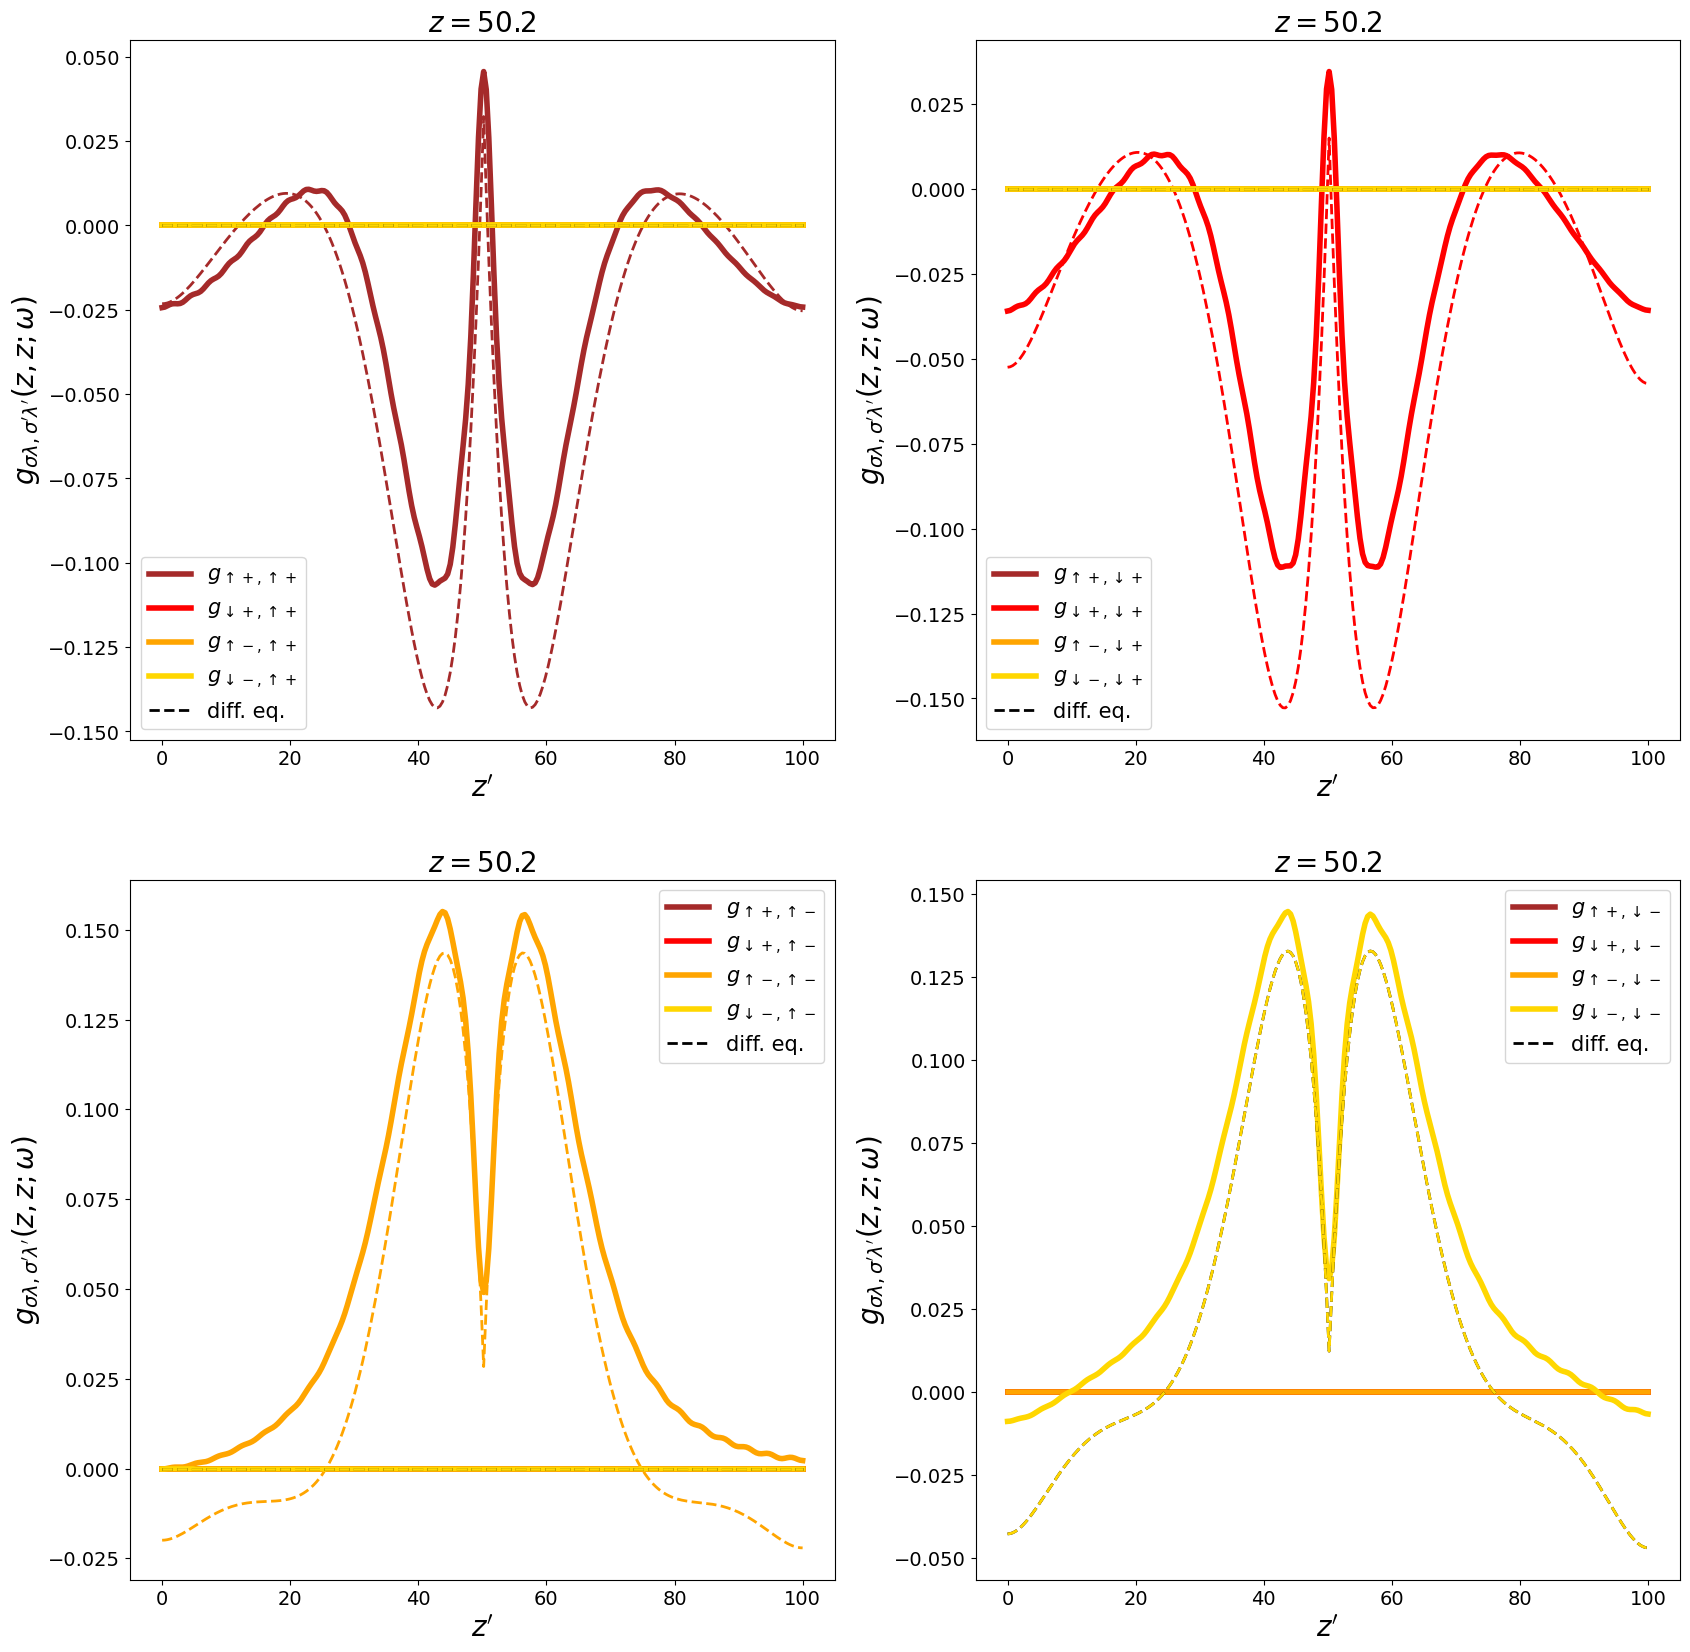

In [9]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']

fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot discretized results
        axs[iPic][jPic].plot(lattice, [gf_discretized[idx][irow][icol].real for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )
        
        # plot diff. eq. results
        if irow == 3:
            axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].real for idx in range(Nlat)], '--', c='black', lw=2, label='diff. eq.')
        
        axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].real for idx in range(Nlat)], '--', c=colors[irow], lw=2)

    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_title('$z = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

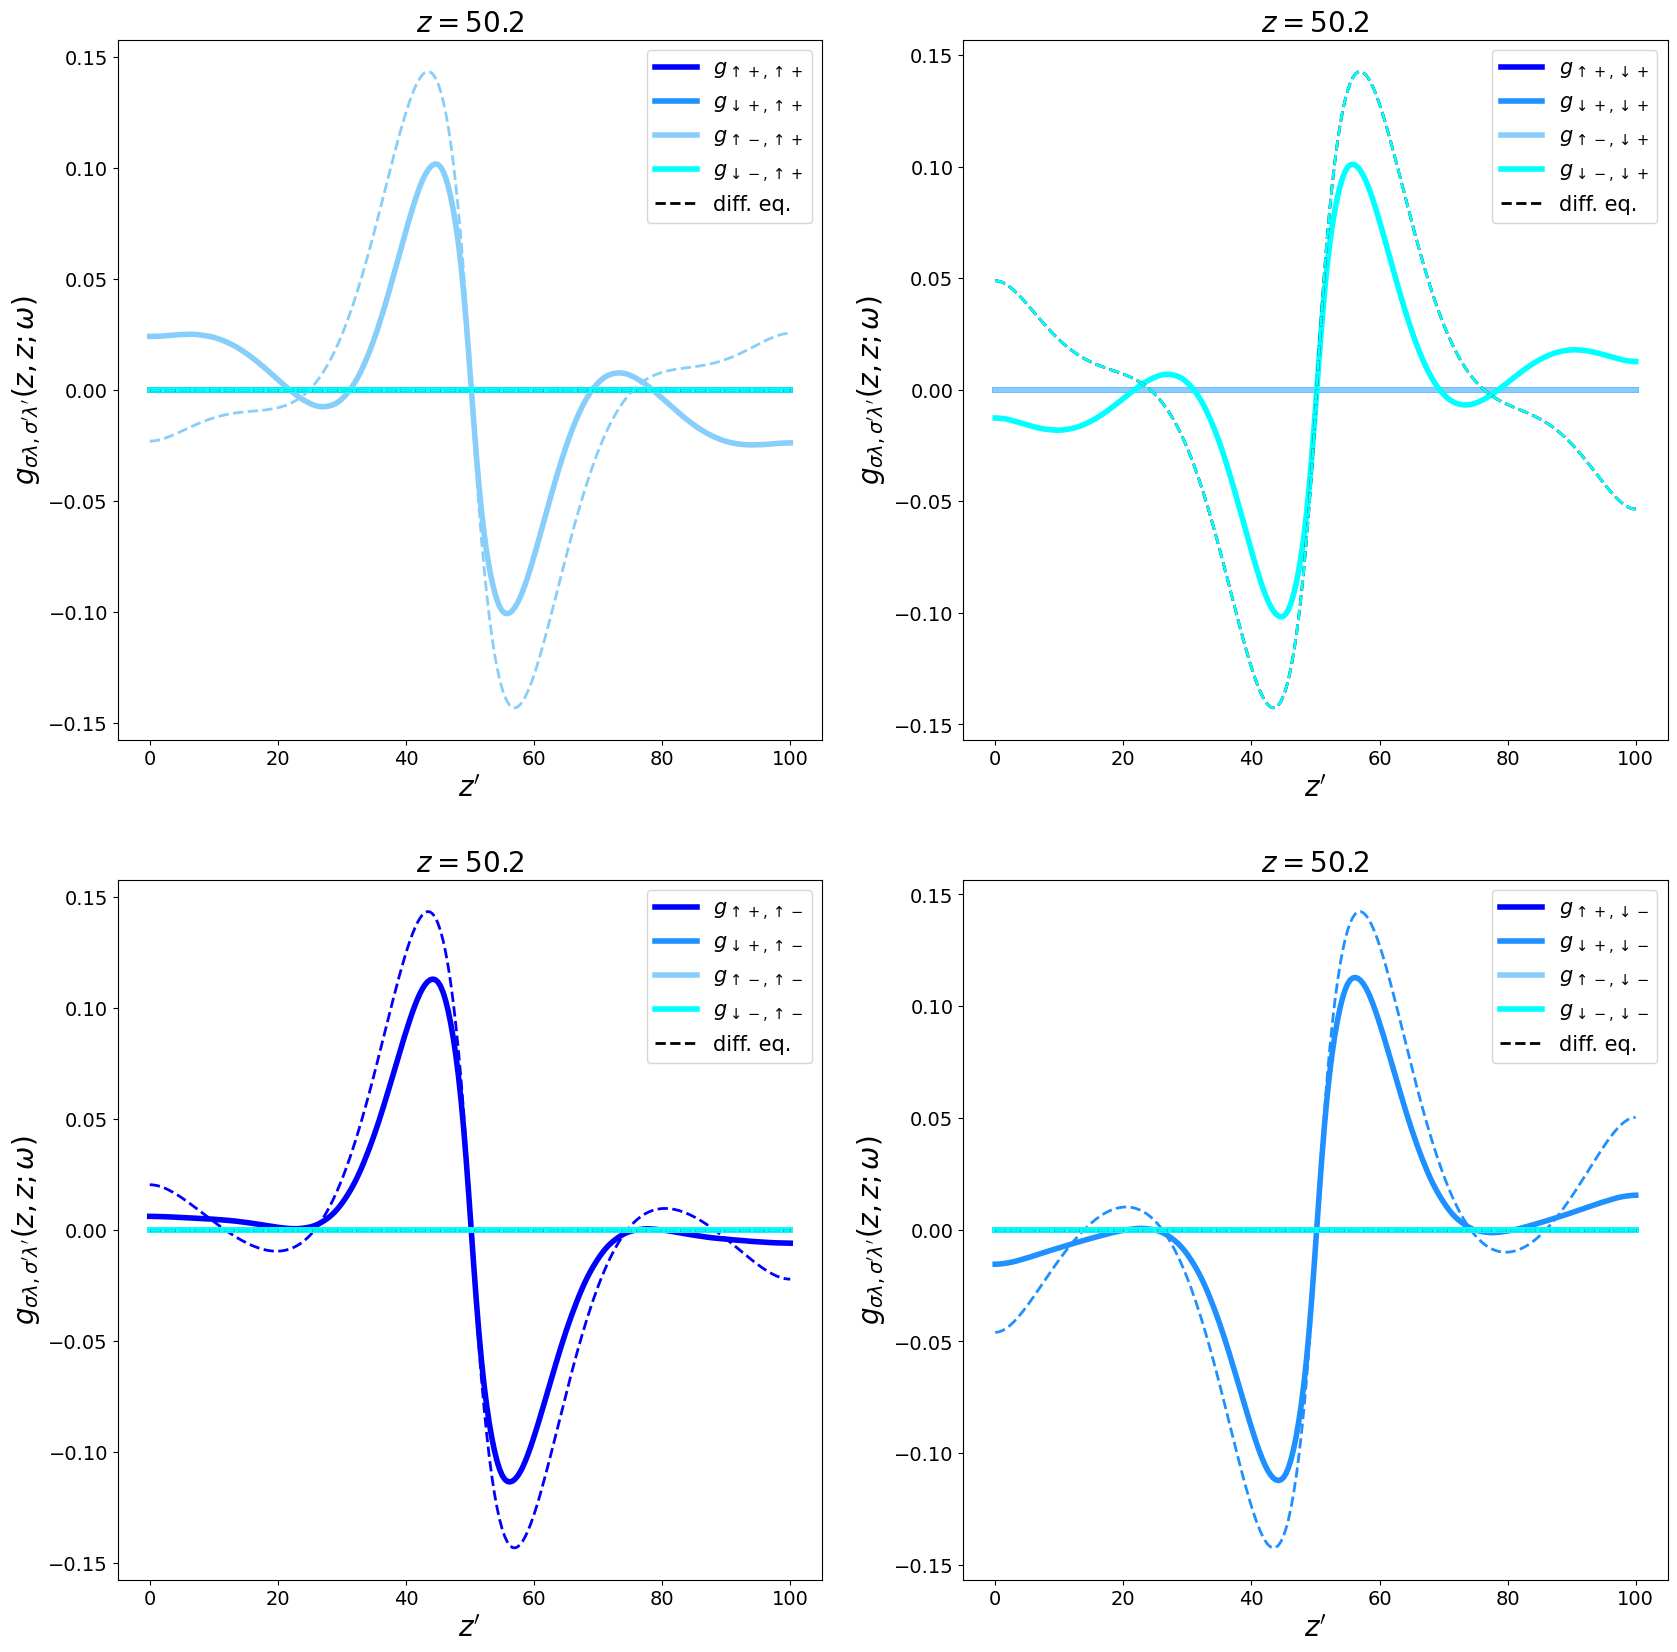

In [10]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']

fig, axs = plt.subplots(2,2, figsize=(20, 20))

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        # plot discretized results
        axs[iPic][jPic].plot(lattice, [gf_discretized[idx][irow][icol].imag for idx in range(Nlat)], c=colors[irow], lw=4, label=labels[irow][icol] )
        
        # plot diff. eq. results
        if irow == 3:
            axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].imag for idx in range(Nlat)], '--', c='black', lw=2, label='diff. eq.')
        
        axs[iPic][jPic].plot(lattice, [gf_diff_eq[idx][irow][icol].imag for idx in range(Nlat)], '--', c=colors[irow], lw=2)
    
    axs[iPic][jPic].set_xlabel("$z'$", fontsize = 20)
    axs[iPic][jPic].set_title('$z = $' + str(round(zp,1)), fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### **Frequency Dependence**

### Surface States

In [11]:
# parameters
kx = 0.; ky = 0.; L = 0.005
# discrete lattice
Nlat = 250; d = 100.; dZ = d/(Nlat-1)
# discretized eigenstates
lattice, egval, spinors = eigenstates_Neumann(Nlat=Nlat, dZ=dZ, kx=kx, ky=ky, L=L)
    
# lattice site
z = 25; print('Lattice spacing: ', str(lattice[z]))

# energy range (real)
energies = np.linspace(0.020, 0.040, 200)
# energy range (w small imaginary part)
energies_complex = [e+1j*1E-8 for e in energies]

# compute exact Green's function on the lattice
gf_diff_eq = np.array([GMTI_NeumannBC(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=e) for e in energies_complex])
# compute approximate Green's function
gf_discretized = np.array([ GMTI_discretized(Nstates=250, egval=egval, spinors=spinors, z=z, Z=z, w=e, eta=1E-8) for e in energies])

Lattice spacing:  10.040160642570282


#### <font color='green'> **Real Part** </font> 

Low energy eigenvalues: [0.02459949+4.59914327e-15j 0.02460051-8.79639354e-15j
 0.03459949-7.30773562e-15j 0.03460051-1.00514323e-14j]



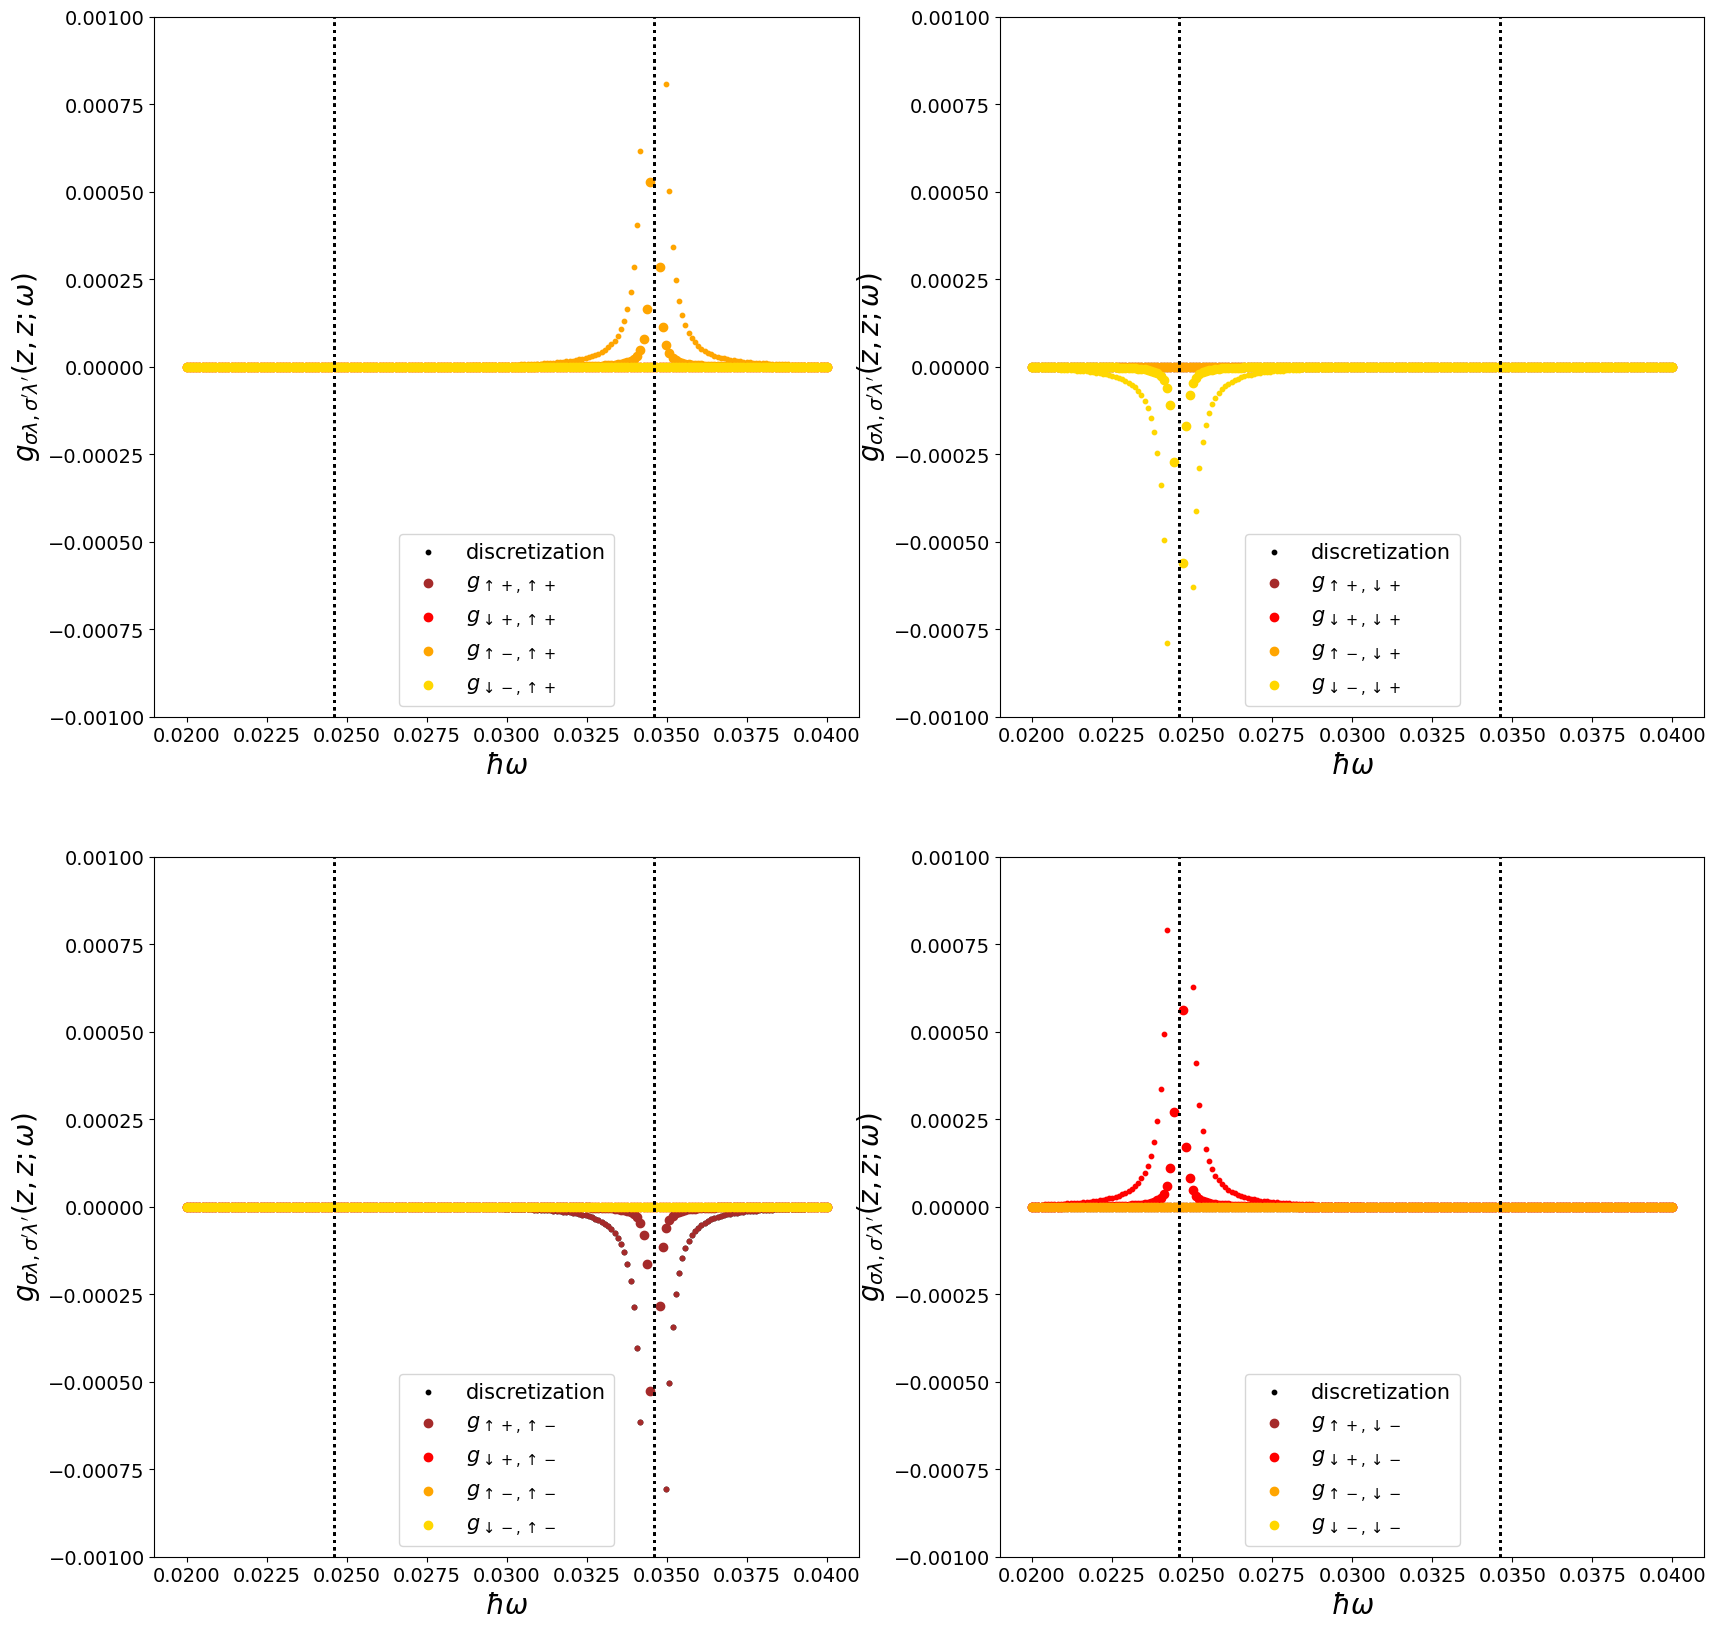

In [12]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# figure
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# energy eigenvalues
print('Low energy eigenvalues: ' + str(egval[:4]) + '\n')

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        for e in egval[:4]:
            axs[iPic][jPic].axvline(x=e.real, color='black', lw=2, ls=':')

        if irow == 0:
            axs[iPic][jPic].scatter(energies, [gf_discretized[idx][irow][icol].real for idx in range(len(energies))], c='black', s=10, label='discretization')
            
        # plot discretized results
        axs[iPic][jPic].scatter(energies, [gf_discretized[idx][irow][icol].real for idx in range(len(energies))], c=colors[irow], s=10)

        # plot diff.eq. results
        axs[iPic][jPic].scatter(energies, [gf_diff_eq[idx][irow][icol].real for idx in range(len(energies))], c=colors[irow], label=labels[irow][icol])

    axs[iPic][jPic].set_ylim(-0.001,0.001)
    
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

Low energy eigenvalues: [0.02459949+4.59914327e-15j 0.02460051-8.79639354e-15j
 0.03459949-7.30773562e-15j 0.03460051-1.00514323e-14j]



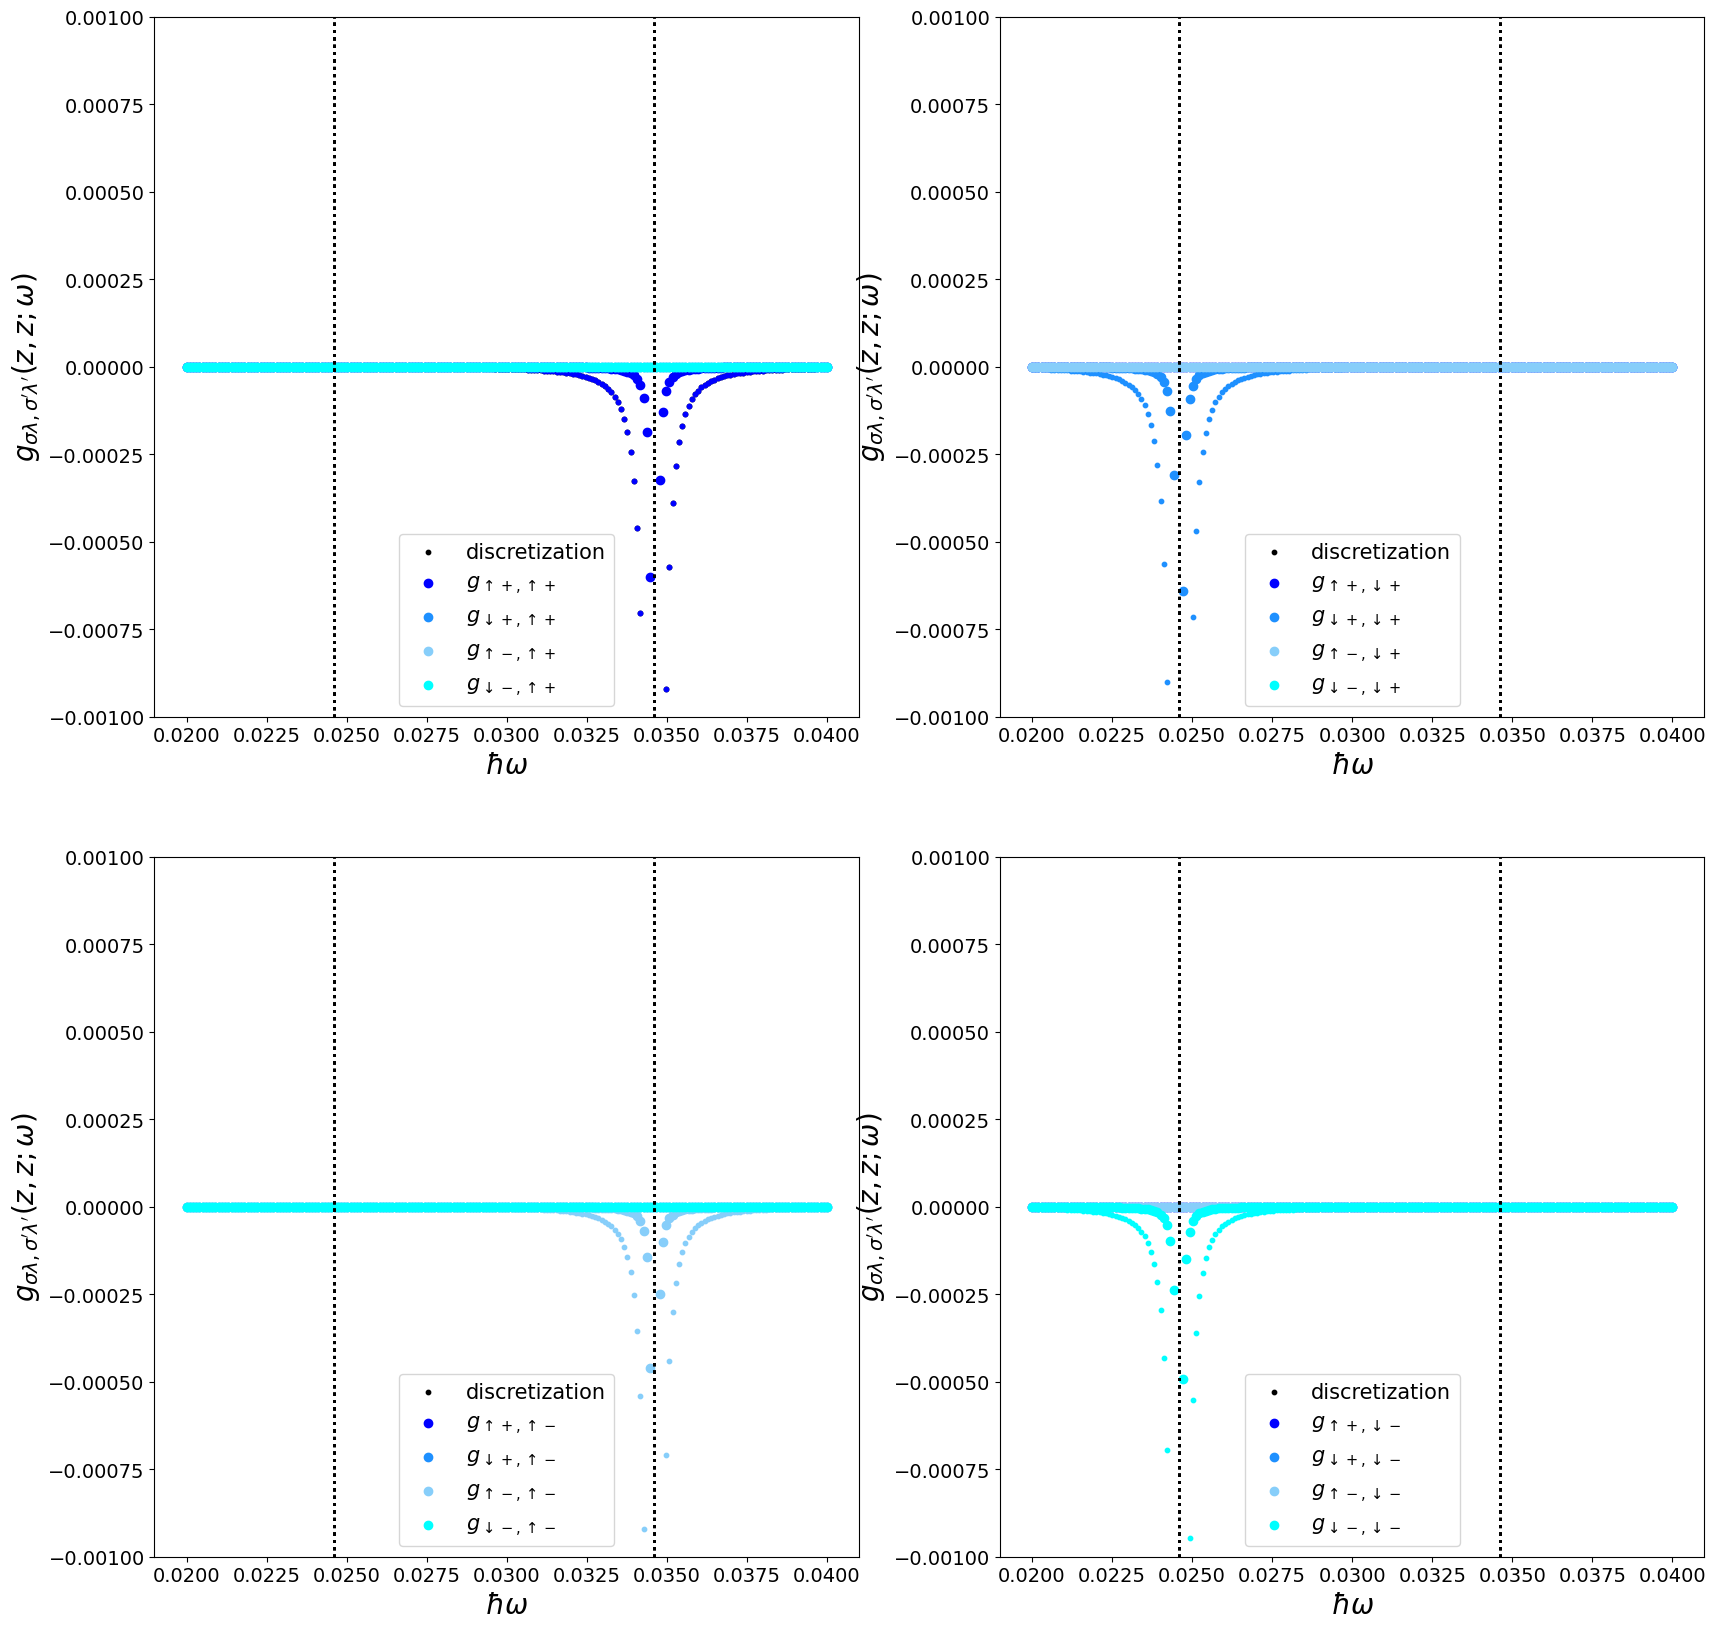

In [13]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# figure
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# energy eigenvalues
print('Low energy eigenvalues: ' + str(egval[:4]) + '\n')

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        for e in egval[:4]:
            axs[iPic][jPic].axvline(x=e.real, color='black', lw=2, ls=':')

        if irow == 0:
            axs[iPic][jPic].scatter(energies, [gf_discretized[idx][irow][icol].imag for idx in range(len(energies))], c='black', s=10, label='discretization')
            
        # plot discretized results
        axs[iPic][jPic].scatter(energies, [gf_discretized[idx][irow][icol].imag for idx in range(len(energies))], c=colors[irow], s=10)

        # plot diff.eq. results
        axs[iPic][jPic].scatter(energies, [gf_diff_eq[idx][irow][icol].imag for idx in range(len(energies))], c=colors[irow], label=labels[irow][icol])

    axs[iPic][jPic].set_ylim(-0.001,0.001)
    
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

### Higher-Energy States


In [14]:
# energy range (real)
energies = np.linspace(0.260, 0.295, 250)
# energy range (w small imaginary part)
energies_complex = [e+1j*1E-8 for e in energies]

# compute exact Green's function on the lattice
gf_diff_eq = np.array([GMTI_NeumannBC(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=e) for e in energies_complex])
# compute approximate Green's function
gf_discretized = np.array([ GMTI_discretized(Nstates=250, egval=egval, spinors=spinors, z=z, Z=z, w=e, eta=1E-8) for e in energies])

#### <font color='green'> **Real Part** </font> 

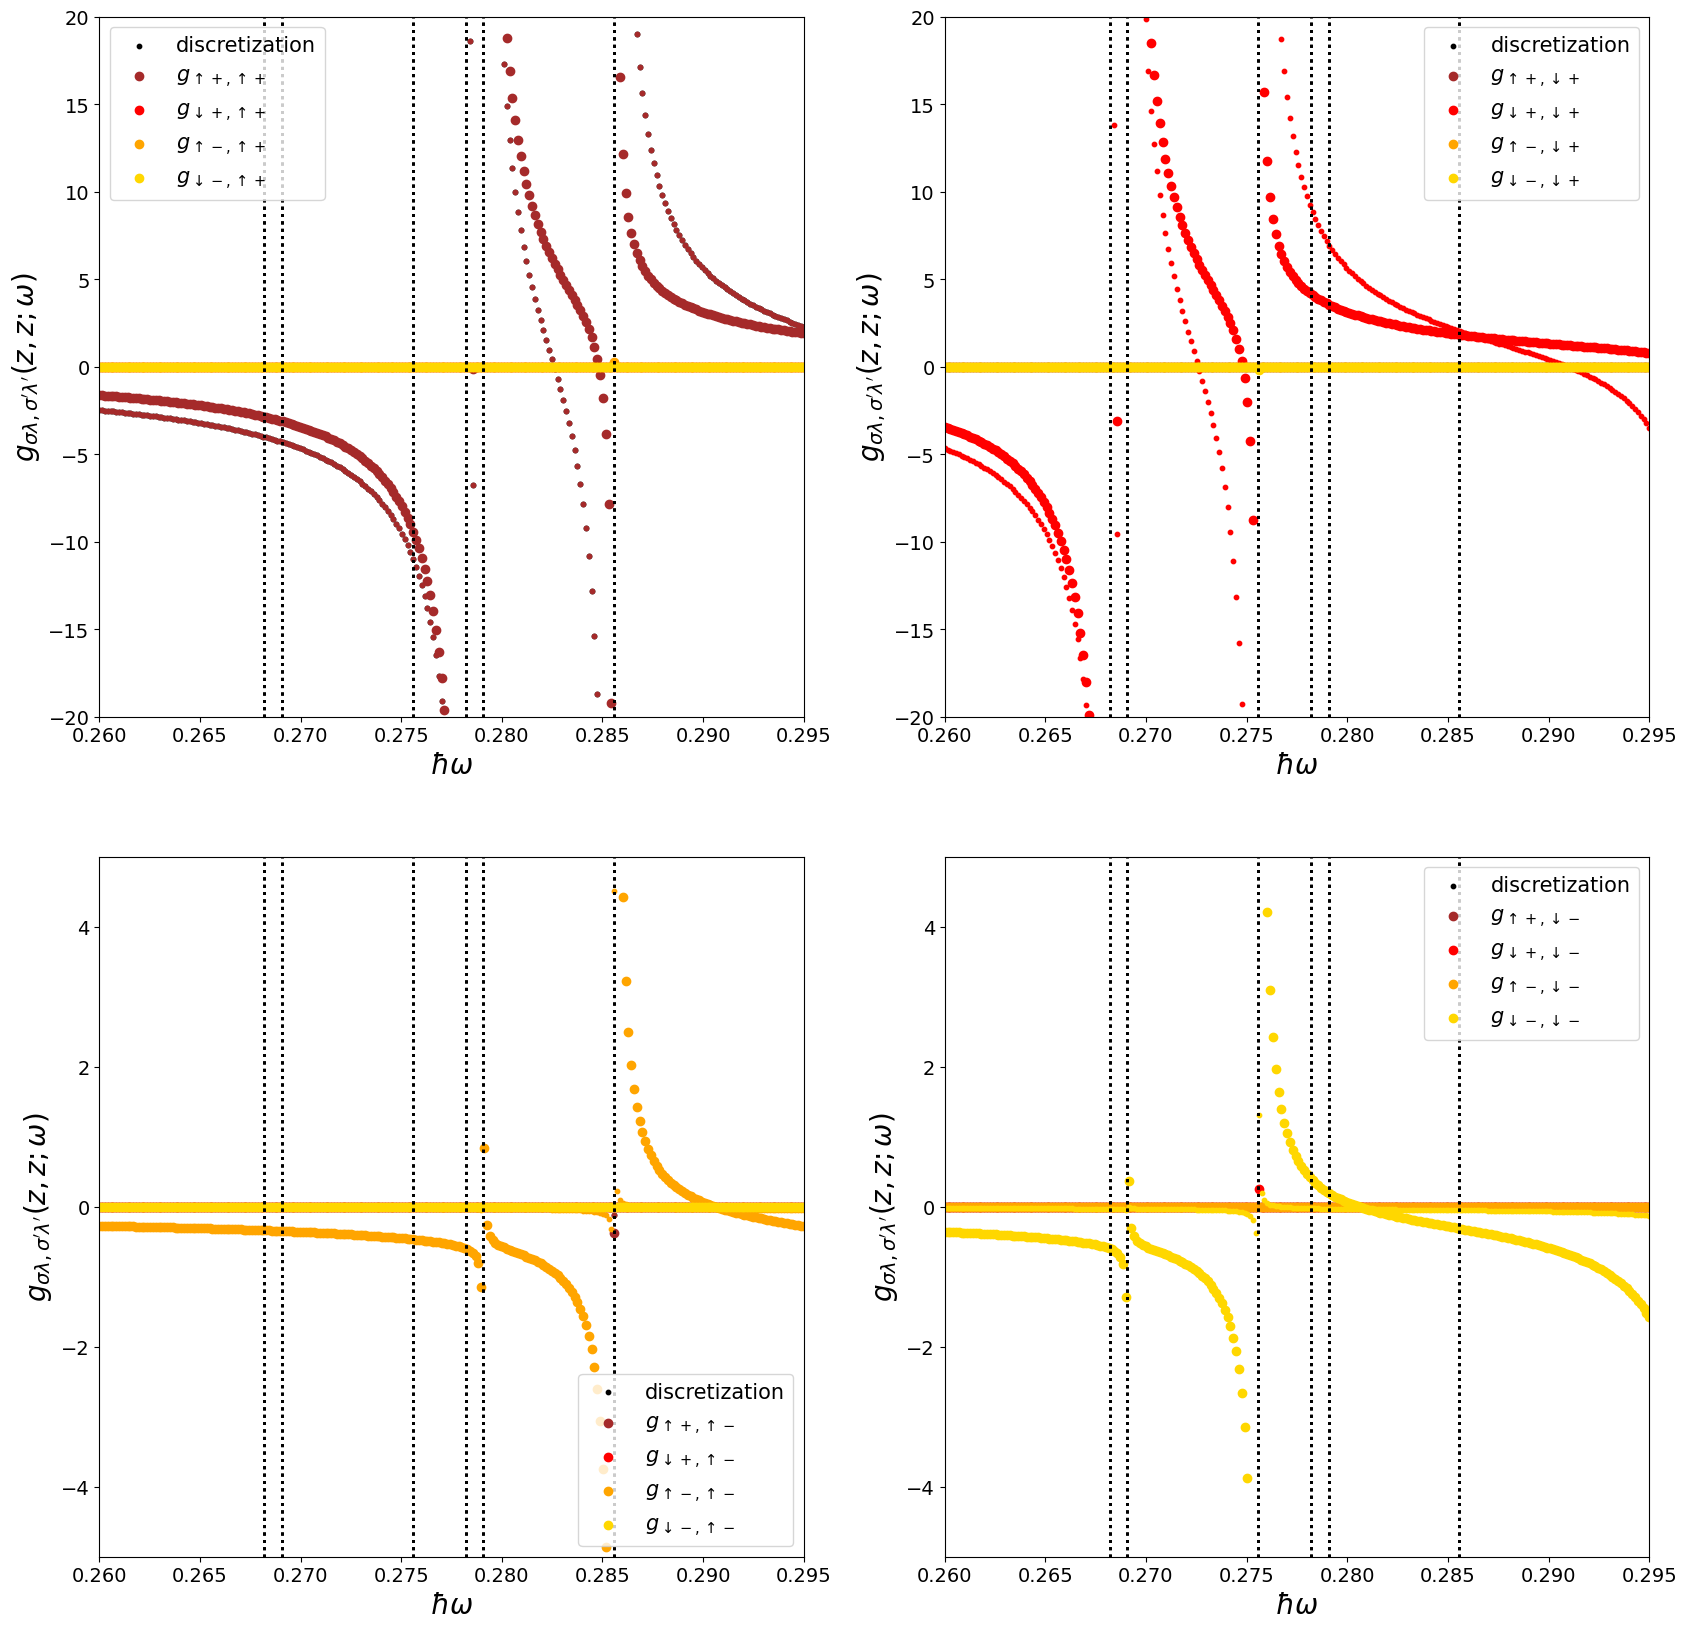

In [15]:
# colors for plotting
colors = ['brown', 'red', 'orange', 'gold']
# figure
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# energy eigenvalues
#print('Low energy eigenvalues: ' + str(egval[:12]) + '\n')

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        for e in egval[:15]:
            axs[iPic][jPic].axvline(x=e.real, color='black', lw=2, ls=':')

        if irow == 0:
            axs[iPic][jPic].scatter(energies, [gf_discretized[idx][irow][icol].real for idx in range(len(energies))], c='black', s=10, label='discretization')
            
        # plot discretized results
        axs[iPic][jPic].scatter(energies, [gf_discretized[idx][irow][icol].real for idx in range(len(energies))], c=colors[irow], s=10)

        # plot diff.eq. results
        axs[iPic][jPic].scatter(energies, [gf_diff_eq[idx][irow][icol].real for idx in range(len(energies))], c=colors[irow], label=labels[irow][icol])

    
    if iPic == 0 :
        axs[iPic][jPic].set_ylim(-20,20)
    else:
        axs[iPic][jPic].set_ylim(-5,5)
        
    axs[iPic][jPic].set_xlim(energies[0], energies[-1])
        
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);

#### <font color='green'> **Imaginary Part** </font> 

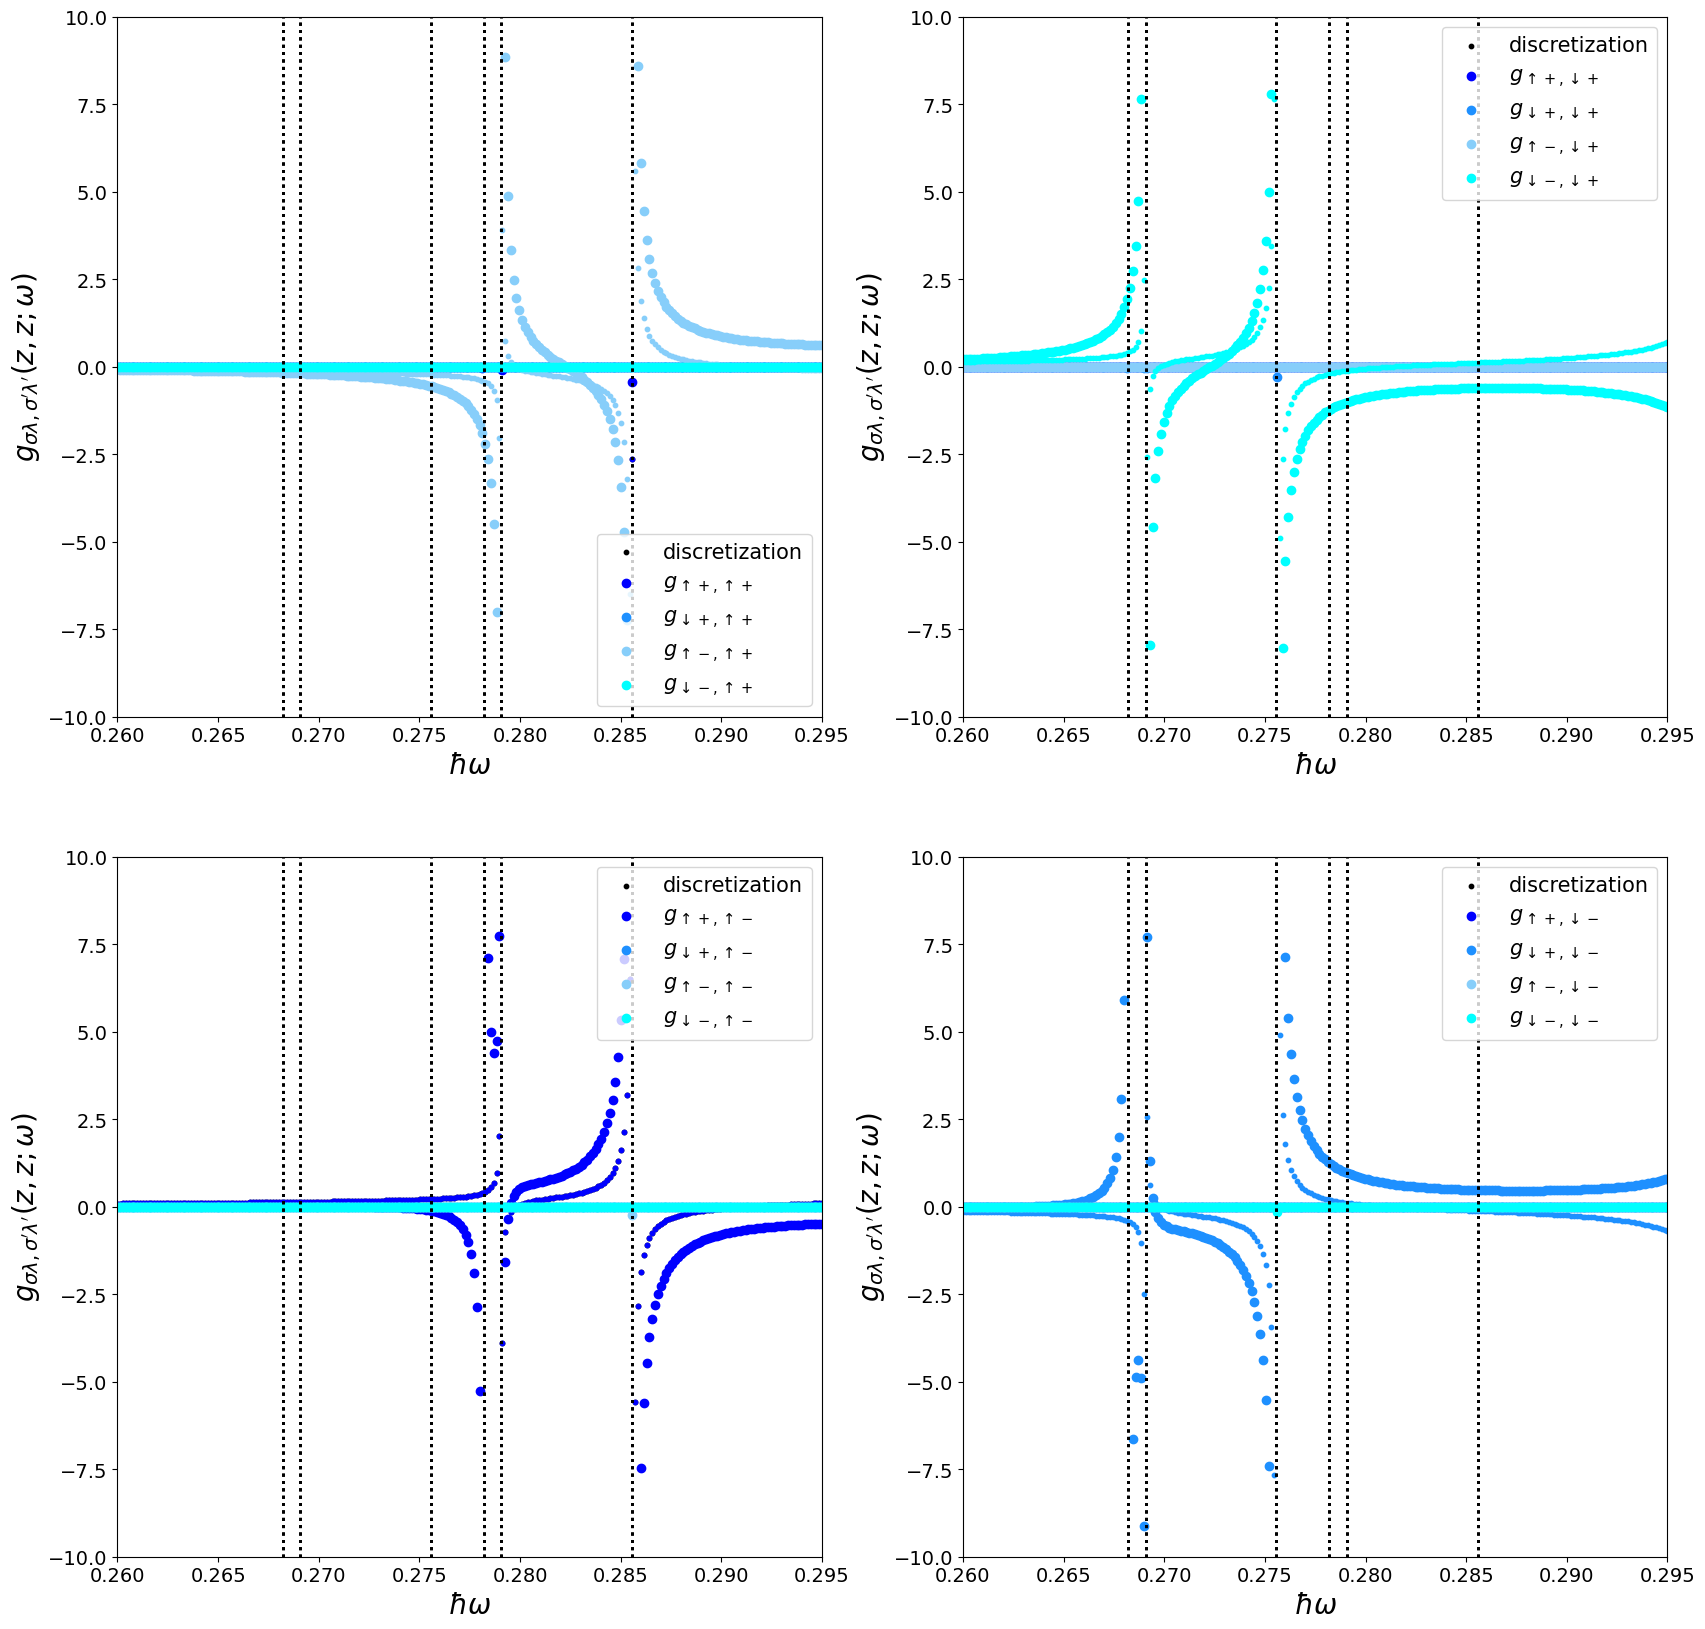

In [16]:
# colors for plotting
colors = ['blue','dodgerblue','lightskyblue','cyan']
# figure
fig, axs = plt.subplots(2,2, figsize=(20, 20))

# energy eigenvalues
#print('Low energy eigenvalues: ' + str(egval[:12]) + '\n')

# indices referred to GF matrix
for icol in range(4):
        
    # indices for plotting
    if icol==0: iPic = 0; jPic = 0
    if icol==1: iPic = 0; jPic = 1
    if icol==2: iPic = 1; jPic = 0
    if icol==3: iPic = 1; jPic = 1
    
    for irow in range(4):

        for e in egval[:15]:
            axs[iPic][jPic].axvline(x=e.real, color='black', lw=2, ls=':')

        if irow == 0:
            axs[iPic][jPic].scatter(energies, [gf_discretized[idx][irow][icol].imag for idx in range(len(energies))], c='black', s=10, label='discretization')

        # plot discretized results
        axs[iPic][jPic].scatter(energies, [gf_discretized[idx][irow][icol].imag for idx in range(len(energies))], c=colors[irow], s=10)
        
        # plot diff.eq. results
        axs[iPic][jPic].scatter(energies, [gf_diff_eq[idx][irow][icol].imag for idx in range(len(energies))], c=colors[irow], label=labels[irow][icol])

    axs[iPic][jPic].set_ylim(-10,10)
    axs[iPic][jPic].set_xlim(energies[0], energies[-1])
        
    axs[iPic][jPic].set_xlabel("$\hbar \omega$", fontsize = 20)
    axs[iPic][jPic].set_ylabel("$g_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 20)
        
    axs[iPic][jPic].tick_params(axis='both', which='major', labelsize=14)        
    axs[iPic][jPic].legend(fontsize=15);